# Contents

1. [Importing the necessary libraries](#1.-Importing-the-necessary-libraries)
2. [Importing CSV dataset](#2.-Importing-CSV-dataset)
3. [Text preprocessing](#3.-Text-preprocessing)
4. [Data visualization](#4.-Data-visualization)
5. [Feature engineering](#5.-Feature-engineering)
6. [Modelling](#6.-Modelling)
7. [Model evaluation](#7.-Model-evaluation)

# 1. Importing the necessary libraries

The NLTK library is a powerful tool for working with human language data and building NLP applications. Its extensive collection of functions, tools, and resources make it a popular choice among researchers and practitioners in the field of NLP. The NLTK library provides functions for text preprocessing tasks such as tokenization, stemming, lemmatization, and removing stop words. 


The sklearn library is a tool for machine learning and data analysis. Its extensive collection of algorithms, tools, and integrations make it a popular choice among data scientists and machine learning practitioners. The sklearn library provides a wide range of machine learning algorithms for classification, regression, clustering, and dimensionality reduction. These algorithms can be used to build predictive models from data, and to extract meaningful insights from complex datasets, and also tools for feature extraction and preprocessing, including text feature extraction, image feature extraction, and data normalization. These tools help to transform raw data into a format that is suitable for machine learning, in addition to, performance metrics that are used for model evaluation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Magda\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# 2. Importing CSV dataset

The data consists of email body and labels for text classification.
1) Message body
2) Labels

In [2]:
df_test = pd.read_csv(r"C:\Users\Magda\Downloads\archive (1)\SMS_test.csv",encoding='cp1252')
df_test

,S. No.,Message_body,Label
0,1,"UpgrdCentre Orange customer, you may now claim...",Spam
1,2,"Loan for any purpose £500 - £75,000. Homeowner...",Spam
2,3,Congrats! Nokia 3650 video camera phone is you...,Spam
3,4,URGENT! Your Mobile number has been awarded wi...,Spam
4,5,Someone has contacted our dating service and e...,Spam
...,...,...,...
120,121,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
121,122,Try to do something dear. You read something f...,Non-Spam
122,123,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
123,124,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam


In [3]:
df_train = pd.read_csv(r"C:\Users\Magda\Downloads\archive (1)\SMS_train.csv",encoding='cp1252')
df_train

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam
...,...,...,...
952,953,hows my favourite person today? r u workin har...,Non-Spam
953,954,How much you got for cleaning,Non-Spam
954,955,Sorry da. I gone mad so many pending works wha...,Non-Spam
955,956,Wat time ü finish?,Non-Spam


# 3. Text preprocessing

## 3.1. drop unimportant columns

drop() is a method used to delete a column from the DataFrame. It can be used to delete rows as well by changing the axis parameter to 0.

In [4]:
df_test.drop('S. No.', inplace=True, axis=1)
df_test.head()

,Message_body,Label
0,"UpgrdCentre Orange customer, you may now claim...",Spam
1,"Loan for any purpose £500 - £75,000. Homeowner...",Spam
2,Congrats! Nokia 3650 video camera phone is you...,Spam
3,URGENT! Your Mobile number has been awarded wi...,Spam
4,Someone has contacted our dating service and e...,Spam


In [5]:
df_train.drop('S. No.', inplace=True, axis=1)
df_train.head()

,Message_body,Label
0,Rofl. Its true to its name,Non-Spam
1,The guy did some bitching but I acted like i'd...,Non-Spam
2,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,Will ü b going to esplanade fr home?,Non-Spam
4,This is the 2nd time we have tried 2 contact u...,Spam


## 3.2. check missing values 

isnull() is a method that returns a DataFrame of the same shape as df, where each element is a Boolean value indicating whether that element is missing (True) or not missing (False).

sum() is a method that returns the sum of the values in each column of the DataFrame. Since True is treated as 1 and False is treated as 0, the result is the number of missing values(1s) in each column.

In [6]:
df_train.isnull().sum()

Message_body    0
Label           0
dtype: int64

In [7]:
df_test.isnull().sum()

Message_body    0
Label           0
dtype: int64

## 3.3. convert all text to lowecase

.str is an attribute that allows you to apply string methods to the values in a column. It is used to access the string methods available for the "Message_body" column.

.lower() is a string method that converts all the text in a string to lowercase

In [8]:
df_train['Message_body'] = df_train['Message_body'].str.lower()
df_test['Message_body'] = df_test['Message_body'].str.lower()

In [9]:
df_train.head()

,Message_body,Label
0,rofl. its true to its name,Non-Spam
1,the guy did some bitching but i acted like i'd...,Non-Spam
2,"pity, * was in mood for that. so...any other s...",Non-Spam
3,will ü b going to esplanade fr home?,Non-Spam
4,this is the 2nd time we have tried 2 contact u...,Spam


In [10]:
df_test.head()

,Message_body,Label
0,"upgrdcentre orange customer, you may now claim...",Spam
1,"loan for any purpose £500 - £75,000. homeowner...",Spam
2,congrats! nokia 3650 video camera phone is you...,Spam
3,urgent! your mobile number has been awarded wi...,Spam
4,someone has contacted our dating service and e...,Spam


## 3.4. remove stopwords 

stopwords is the name of the NLTK corpus that contains a list of stopwords for many languages, including English.

.words() is a method that returns a list of the stopwords for a given language. In this case, we're using the English stopwords.

'english' is the argument passed to the .words() method to specify the language of the stopwords we want to retrieve.

In [11]:
stop_words = stopwords.words('english')
df_train['Message_body'] = df_train['Message_body'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df_test['Message_body'] = df_test['Message_body'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [12]:
df_train.head()

,Message_body,Label
0,rofl. true name,Non-Spam
1,guy bitching acted like i'd interested buying ...,Non-Spam
2,"pity, * mood that. so...any suggestions?",Non-Spam
3,ü b going esplanade fr home?,Non-Spam
4,2nd time tried 2 contact u. u £750 pound prize...,Spam


In [13]:
df_test.head()

,Message_body,Label
0,"upgrdcentre orange customer, may claim free ca...",Spam
1,"loan purpose £500 - £75,000. homeowners + tena...",Spam
2,congrats! nokia 3650 video camera phone call 0...,Spam
3,urgent! mobile number awarded £2000 prize guar...,Spam
4,someone contacted dating service entered phone...,Spam


## 3.5. remove punctuations 

.replace() is a string method that replaces all occurrences of a pattern in a string with a specified replacement string. 

r'[^\w\s]+' is a regular expression pattern that matches any punctuation character.

In [14]:
df_train['Message_body'] = df_train['Message_body'].str.replace(r'[^\w\s]+', '')
df_train.head()

C:\Users\Magda\AppData\Local\Temp\ipykernel_10096\2967138045.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_train['Message_body'] = df_train['Message_body'].str.replace(r'[^\w\s]+', '')


,Message_body,Label
0,rofl true name,Non-Spam
1,guy bitching acted like id interested buying s...,Non-Spam
2,pity mood that soany suggestions,Non-Spam
3,ü b going esplanade fr home,Non-Spam
4,2nd time tried 2 contact u u 750 pound prize 2...,Spam


In [15]:
df_test['Message_body'] = df_test['Message_body'].str.replace(r'[^\w\s]+', '')
df_test.head()

C:\Users\Magda\AppData\Local\Temp\ipykernel_10096\3430827019.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_test['Message_body'] = df_test['Message_body'].str.replace(r'[^\w\s]+', '')


,Message_body,Label
0,upgrdcentre orange customer may claim free cam...,Spam
1,loan purpose 500 75000 homeowners tenants we...,Spam
2,congrats nokia 3650 video camera phone call 09...,Spam
3,urgent mobile number awarded 2000 prize guaran...,Spam
4,someone contacted dating service entered phone...,Spam


## 3.6. perform stemming 

Stemming is a process in natural language processing (NLP) that involves reducing words to their base or root form, called the stem. The purpose of stemming is to reduce the dimensionality of text data by grouping together words that have the same root meaning. This can help to improve the efficiency and accuracy of NLP models by reducing the number of unique words that need to be processed

PorterStemmer() is a class in the NLTK library that implements the Porter stemming algorithm, which is a widely used algorithm for stemming words in natural language processing (NLP)

The lambda function takes each sentence, tokenizes it into individual words using word_tokenize(), and then applies the stemming algorithm to each word. Finally, the words are joined back together into a sentence using ' '.join() and the result is stored back in the text column of the train_data df_train and df_test.

In [16]:
stemmer = PorterStemmer()
df_train['Message_body'] = df_train['Message_body'].apply(lambda x: ' '.join([stemmer.stem(word) for word in word_tokenize(x)]))
df_test['Message_body'] = df_test['Message_body'].apply(lambda x: ' '.join([stemmer.stem(word) for word in word_tokenize(x)]))

In [17]:
df_test.head()

,Message_body,Label
0,upgrdcentr orang custom may claim free camera ...,Spam
1,loan purpos 500 75000 homeown tenant welcom pr...,Spam
2,congrat nokia 3650 video camera phone call 090...,Spam
3,urgent mobil number award 2000 prize guarante ...,Spam
4,someon contact date servic enter phone fanci y...,Spam


In [18]:
df_train.head()

,Message_body,Label
0,rofl true name,Non-Spam
1,guy bitch act like id interest buy someth els ...,Non-Spam
2,piti mood that soani suggest,Non-Spam
3,ü b go esplanad fr home,Non-Spam
4,2nd time tri 2 contact u u 750 pound prize 2 c...,Spam


# 4. Data visualization

.value_counts() is a Pandas method that counts the frequency of each unique value in a column of a DataFrame.

sort is a parameter specifing that if the unique values are sorted in any particular order.

.plot() is a method that creates a plot of the data in a DataFrame.

kind is a parameter specifing the kind of the plot being chosen.

<AxesSubplot:ylabel='Label'>

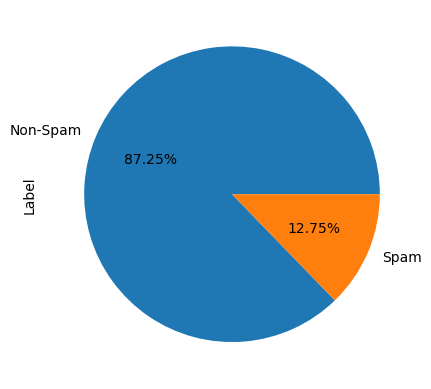

In [19]:
df_train['Label'].value_counts(sort=False).plot(kind='pie',autopct='%.2f%%')

# 5. Feature engineering

## 5.1. Bag of words

The bag of words technique is a common method in natural language processing (NLP) that is used to represent text data as a numerical vector. The basic idea behind the bag of words technique is to count the frequency of each word in a piece of text and represent the text as a vector of word counts.

The bag of words technique is a simple and effective way to represent text data as a numerical vector, but it has some limitations. For example, it does not take into account the order or context of words in the text, which can be important for some NLP tasks. Additionally, it can be sensitive to stop words and rare words, which can skew the results. However, with appropriate preprocessing and feature selection, the bag of words technique can be a powerful tool for working with text data.

fit_transform() is a combination of the fit() and transform() methods, which is used to both fit and transform the training data set at the same time, while transform() is used to only transform the data using a previously fitted model.

In [20]:
v = CountVectorizer()

train_bow = v.fit_transform(df_train['Message_body'])
df_train_bow = pd.DataFrame(train_bow.toarray(),columns=v.get_feature_names())
df_train_bow

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0121,02070836089,02073162414,020903,060505,061104,07099833605,0776xxxxxxx,078,07808247860,...,younger,your,yovil,yr,yummi,yuo,yup,zebra,zed,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
952,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
953,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
954,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
955,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
test_bow = v.transform(df_test['Message_body'])
df_test_bow = pd.DataFrame(test_bow.toarray(),columns=v.get_feature_names())
df_test_bow

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0121,02070836089,02073162414,020903,060505,061104,07099833605,0776xxxxxxx,078,07808247860,...,younger,your,yovil,yr,yummi,yuo,yup,zebra,zed,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
121,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
122,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
123,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 5.2. Label encoding

Label encoding is a technique for converting categorical data into numerical data that can be used for machine learning models. In this technique, each unique category value is assigned a numerical label, with the labels ranging from 0 to N-1, where N is the number of unique categories.

In [22]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df_train['Label'] = encoder.fit_transform(df_train['Label'])
df_train['Label']

0      0
1      0
2      0
3      0
4      1
      ..
952    0
953    0
954    0
955    0
956    0
Name: Label, Length: 957, dtype: int32

In [23]:
df_test['Label'] = encoder.fit_transform(df_test['Label'])
df_test['Label']

0      1
1      1
2      1
3      1
4      1
      ..
120    0
121    0
122    0
123    0
124    0
Name: Label, Length: 125, dtype: int32

# 6. Modelling

## 6.1. SVM

Support Vector Machines (SVMs) are a type of supervised machine learning algorithm that can be used for classification, regression and outlier detection tasks. The goal of SVM is to find the optimal hyperplane that maximally separates the data points of different classes in a high-dimensional space.

While training, the algorithm tries to find the optimal hyperplane that maximally separates the data points of different classes. The hyperplane is the decision boundary that separates the different classes of data. The hyperplane is defined as the line that maximizes the margin between the two classes. The margin is the distance between the hyperplane and the nearest data points of each class.

SVMs have several advantages over other classification algorithms. They can handle large feature sets, work well in high-dimensional spaces, and are effective in cases where the number of features is greater than the number of samples. SVMs can also be used for both linear and non-linear problems.

SVMs work by finding a hyperplane that maximally separates the data into two classes - in this case, spam and not spam. The SVM algorithm tries to find the hyperplane that maximizes the margin between the two classes, which is the distance between the hyperplane and the closest data points from each class. The points that lie closest to the hyperplane are called support vectors, and they determine the position and orientation of the hyperplane.

In [24]:
from sklearn.svm import SVC

svm_bow = SVC()
svm_bow.fit(train_bow,df_train['Label'])

SVC()

In [25]:
y_pred_svm_bow = svm_bow.predict(test_bow)

There are several evaluation metrics that can be used to assess the performance of classification algorithms.

Accuracy: This is the proportion of correctly classified instances out of the total number of instances. It is a simple and intuitive metric, but it can be misleading if the classes are imbalanced.

Precision: This is the proportion of true positives (correctly predicted positive instances) out of the total number of positive predictions. It measures the accuracy of positive predictions.

Recall: This is the proportion of true positives out of the total number of actual positive instances. It measures the ability of the model to identify positive instances.

Weighted average precision& recall takes into account the class imbalance in the data by calculating the precision and recall for each class separately and then weighting the result by the number of samples in each class.

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
accuracies=[]
precisions = []
recalls = []
accuracy_svm_bow = accuracy_score(df_test['Label'],y_pred_svm_bow)
precision_svm_bow = precision_score(df_test['Label'],y_pred_svm_bow,average='weighted')
recall_svm_bow = recall_score(df_test['Label'],y_pred_svm_bow,average='weighted')
print(accuracy_svm_bow)
print(precision_svm_bow)
print(recall_svm_bow)

accuracies.append(accuracy_svm_bow)
precisions.append(precision_svm_bow)
recalls.append(recall_svm_bow)

0.72
0.8366666666666668
0.72


## 6.2. Random Forest

Random Forest is a popular ensemble learning algorithm that is used for both classification and regression problems. It is an extension of the decision tree algorithm that builds multiple decision trees and combines their outputs to make the final prediction.

While training, the model Randomly sample the training data with replacement to create multiple subsets of data(bootstrapping), for each subset of data, it builds a decision tree using a random subset of the features, and finally Combine the outputs of all the decision trees using voting to make the final prediction.

Random Forest is also less prone to overfitting than decision trees because it combines the outputs of multiple trees.

Random Forest works by building multiple decision trees on different subsets of the training data and then combining the results to make a final prediction. Each decision tree in the forest is built using a random subset of the training data and a random subset of the features. This helps to reduce overfitting and improve the generalization performance of the model.

In [27]:
from sklearn.ensemble import RandomForestClassifier

rf_bow = RandomForestClassifier()
rf_bow.fit(train_bow,df_train['Label'])
y_pred_rf_bow = rf_bow.predict(test_bow)

In [28]:
accuracy_rf_bow = accuracy_score(df_test['Label'],y_pred_rf_bow)
precision_rf_bow = precision_score(df_test['Label'],y_pred_rf_bow,average='weighted')
recall_rf_bow = recall_score(df_test['Label'],y_pred_rf_bow,average='weighted')
print(accuracy_rf_bow)
print(precision_rf_bow)
print(recall_rf_bow)

accuracies.append(accuracy_rf_bow)
precisions.append(precision_rf_bow)
recalls.append(recall_rf_bow)

0.736
0.8422439024390244
0.736


## 5.3. TF-IDF

TF-IDF (term frequency-inverse document frequency) is a commonly used encoding technique in natural language processing (NLP) that is used to represent text data as a numerical vector. The basic idea behind the TF-IDF technique is to weigh each word in a piece of text by its frequency in the document and its rarity in the corpus of documents being analyzed.

The resulting TF-IDF scores can be used to represent each piece of text as a numerical vector, where each dimension corresponds to a word in the vocabulary. The TF-IDF scores for each word in the document represent the importance of that word in the document relative to its importance in the corpus.

The TF-IDF technique is a powerful way to represent text data as a numerical vector, as it takes into account both the frequency of the word in the document and its rarity in the corpus. This can help to identify important words and phrases in a piece of text and can be used for tasks such as text classification, information retrieval, and more.

In [29]:
vectorizer = TfidfVectorizer()

train_tfidf = vectorizer.fit_transform(df_train['Message_body'])

train_tfidf_df = pd.DataFrame(train_tfidf.toarray(), columns=vectorizer.get_feature_names())

train_tfidf_df

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0121,02070836089,02073162414,020903,060505,061104,07099833605,0776xxxxxxx,078,07808247860,...,younger,your,yovil,yr,yummi,yuo,yup,zebra,zed,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
952,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
953,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
954,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
955,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
test_tfidf = vectorizer.transform(df_test['Message_body'])

test_tfidf_df = pd.DataFrame(test_tfidf.toarray(), columns=vectorizer.get_feature_names())

test_tfidf_df

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0121,02070836089,02073162414,020903,060505,061104,07099833605,0776xxxxxxx,078,07808247860,...,younger,your,yovil,yr,yummi,yuo,yup,zebra,zed,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
svm_tf = SVC()
svm_tf.fit(train_tfidf,df_train['Label'])
y_pred_svm_tf = svm_tf.predict(test_tfidf)

In [32]:
accuracy_svm_tf = accuracy_score(df_test['Label'],y_pred_svm_tf)
precision_svm_tf = precision_score(df_test['Label'],y_pred_svm_tf,average='weighted')
recall_svm_tf = recall_score(df_test['Label'],y_pred_svm_tf,average='weighted')
print(accuracy_svm_tf)
print(precision_svm_tf)
print(recall_svm_tf)

accuracies.append(accuracy_svm_tf)
precisions.append(precision_svm_tf)
recalls.append(recall_svm_tf)

0.728
0.8394216867469879
0.728


In [33]:
rf_tf = RandomForestClassifier()
rf_tf.fit(train_tfidf,df_train['Label'])
y_pred_rf_tf = rf_tf.predict(test_tfidf)

In [34]:
accuracy_rf_tf = accuracy_score(df_test['Label'],y_pred_rf_tf)
precision_rf_tf = precision_score(df_test['Label'], y_pred_rf_tf,average='weighted')
recall_rf_tf = recall_score(df_test['Label'], y_pred_rf_tf,average='weighted')
print(accuracy_rf_tf)
print(precision_rf_tf)
print(recall_rf_tf)

accuracies.append(accuracy_rf_tf)
precisions.append(precision_rf_tf)
recalls.append(recall_rf_tf)

print(accuracies)
print(precisions)
print(recalls)

0.744
0.8451358024691358
0.744
[0.72, 0.736, 0.728, 0.744]
[0.8366666666666668, 0.8422439024390244, 0.8394216867469879, 0.8451358024691358]
[0.72, 0.736, 0.728, 0.744]


# 7. Model evaluation 

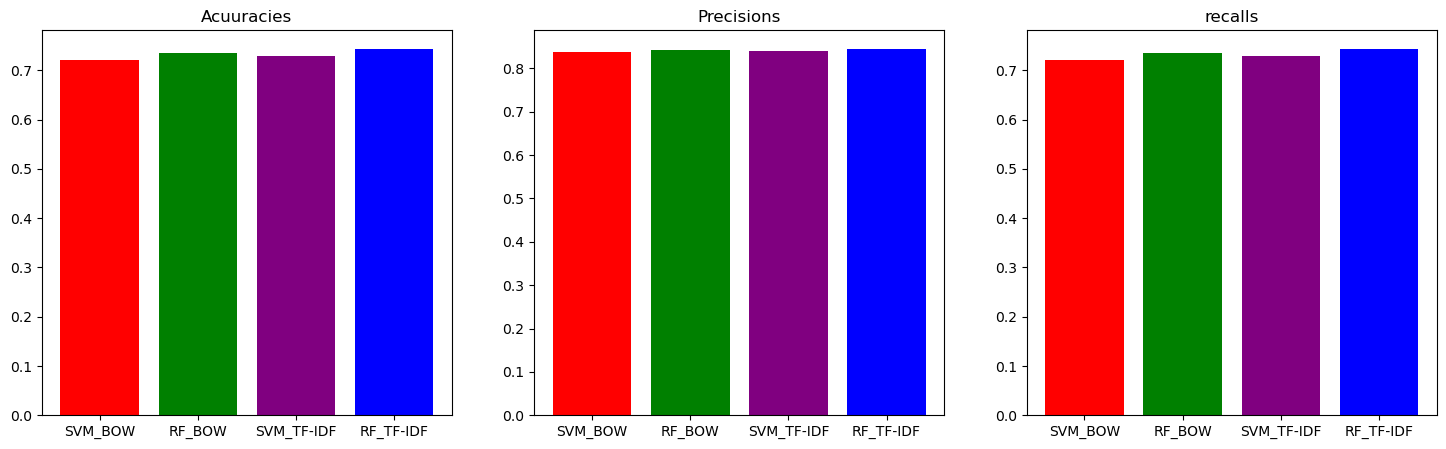

In [35]:
labels = ['SVM_BOW','RF_BOW','SVM_TF-IDF','RF_TF-IDF']

fig, axs = plt.subplots(1, 3, figsize=(18, 5))
colors = ['red','green','purple','blue']

axs[0].bar(labels, accuracies, color = colors)
axs[0].set_title('Acuuracies')

axs[1].bar(labels, precisions, color = colors)
axs[1].set_title('Precisions')

axs[2].bar(labels, recalls, color = colors)
axs[2].set_title('recalls')
plt.show()